<a href="https://colab.research.google.com/github/amarnepali/Dogs_vs_Cats/blob/master/style_transfer_model_teting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

from tensorflow.python.client import device_lib;
import tensorflow as tf;

# Make sure tensorflow 1.x prints below, you may need to restart the runtime. Runtime => Restart Runtime
print(tf.__version__)

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

TensorFlow 1.x selected.
1.15.2
Show System RAM Memory:


MemTotal:       13333596 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8062512439647072146
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16700143170278436022
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12247787267263004872
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14949928141
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5475690334793316877
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [5]:
#Download neural_style.py
#This code originates from https://github.com/cysmith/neural-style-tf
!wget --output-document=neural_style.py 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py'
  
  
#Download ImageNet VGG Very Deep
#VGG-VD models from the Very Deep Convolutional Networks for Large-Scale Visual Recognition project.
!wget --output-document=imagenet-vgg-verydeep-19.mat 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat'
  

--2021-02-13 05:31:21--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30650 (30K) [text/x-python-script]
Saving to: ‘neural_style.py’

neural_style.py     100%[===================>]  29.93K  --.-KB/s    in 0.002s  

2021-02-13 05:31:21 (12.2 MB/s) - ‘neural_style.py’ saved [30650/30650]

--2021-02-13 05:31:22--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

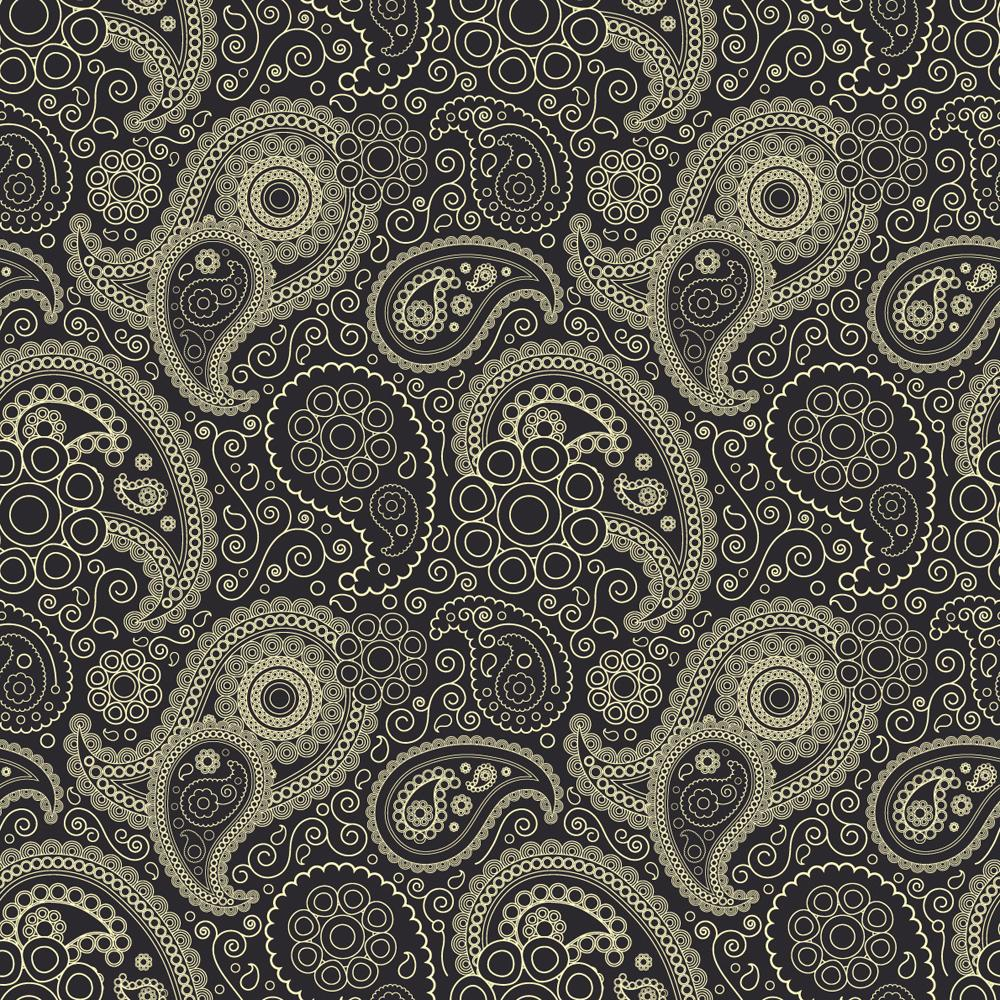

In [6]:
import re
from IPython.display import Image
import urllib.request

def download_image_from_URL(imageURL):
  imageName = re.search('[a-z0-9\-]+\.(jpe?g|png|gif|bmp)', imageURL, re.IGNORECASE)
  imageName = imageName.group(0)
  urllib.request.urlretrieve(imageURL, imageName)
  imagePath = "./" + imageName
  return imagePath
   
#Download Image from URL and Store Path in Variable

#Content image model.jpg
imageDownload1 = download_image_from_URL("https://storage.googleapis.com/marketing-files/yt-back.png")


#Style image polygon-2.jpg
imageDownload3 = download_image_from_URL("https://i.stack.imgur.com/ayYiJ.jpg")

#Display Local Image
Image(imageDownload3)              


---- RENDERING SINGLE IMAGE ----


2021-02-13 05:48:30.023753: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-02-13 05:48:30.028886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-13 05:48:30.029457: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-02-13 05:48:30.029709: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-02-13 05:48:30.031001: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-02-13 05:48:30.032356: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened 

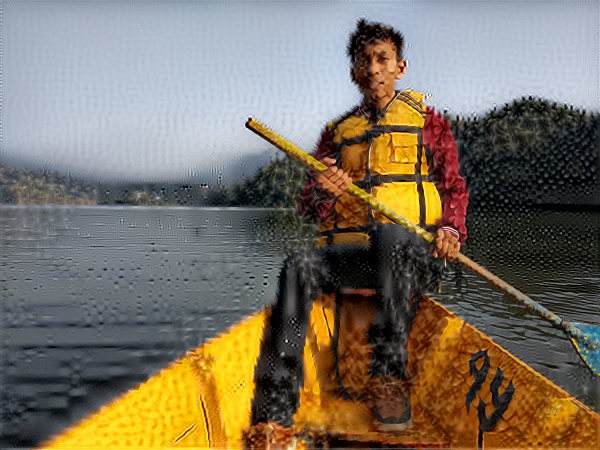

In [12]:
%tensorflow_version 1.x
from IPython.display import Image

! python3 neural_style.py --content_img_dir ./ \
                       --content_img /content/test_me.jpg \
                       --style_imgs_dir ./ \
                       --style_imgs /content/download.jpeg \
                       --style_imgs_weights 1  \
                       --max_iterations 100 \
                       --max_size 600 \
                       --img_name output \
                       --content_weight 1 \
                       --original_colors \
                       --device /gpu:0 \
                       --img_output_dir ./ \
                       --verbose;
                    
# Print Final Image
Image('./output/output.png')

In [13]:
from google.colab import files
files.download('./output/output.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>